### PHASE 1 - NORMAL TASK - GLOBAL TERRORISM EXPLORATORY DATA ANALYSIS - CODERSCAVE 

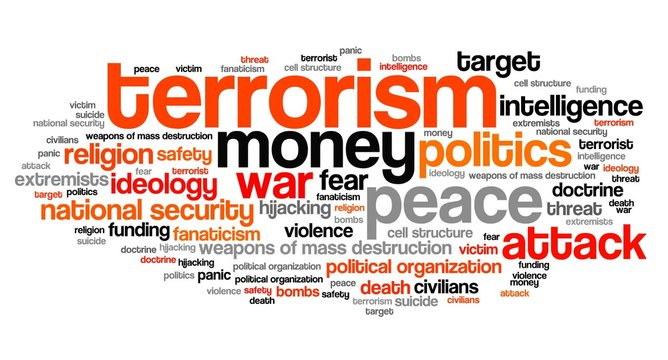

#### Objective
- The aim is to define ways to interpret and understand the dataset and present reasonable findings that might help to deal with Global terrorism. 

#### Dataset source & brief
- The dataset has been sourced from Kaggle .
- It is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load & read the dataset

In [2]:
dataset=pd.read_csv(r"C:\Users\manme\Documents\Priya\Coderscave\globalterrorism1.txt")
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Basic info about the dataset

In [3]:
dataset.shape  # Check shape

(181691, 135)

- Dataset has 181691 rows and 135 columns

In [4]:
dataset.columns  #check column names

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
dataset.duplicated().sum()  #check duplicates

0

- No duplicates present

In [8]:
print((dataset.isnull().sum()/len(dataset)*100).to_markdown())  #check null values percentage

|                    |            0 |
|:-------------------|-------------:|
| eventid            |  0           |
| iyear              |  0           |
| imonth             |  0           |
| iday               |  0           |
| approxdate         | 94.915       |
| extended           |  0           |
| resolution         | 98.7781      |
| country            |  0           |
| country_txt        |  0           |
| region             |  0           |
| region_txt         |  0           |
| provstate          |  0.231712    |
| city               |  0.238867    |
| latitude           |  2.50755     |
| longitude          |  2.5081      |
| specificity        |  0.00330231  |
| vicinity           |  0           |
| location           | 69.4564      |
| summary            | 36.3964      |
| crit1              |  0           |
| crit2              |  0           |
| crit3              |  0           |
| doubtterr          |  0.000550385 |
| alternative        | 84.0328      |
| alternativ

#### Picking only Signficant variables

In [19]:
df=dataset[['iyear','imonth','iday','extended','country_txt','region_txt','city','latitude','longitude',
            'doubtterr','multiple', 'success','suicide','attacktype1_txt','targtype1_txt','natlty1_txt','gname',
            'individual','weaptype1_txt','property','ishostkid','INT_LOG','INT_IDEO']]

#### Renaming the columns for easy understanding

In [20]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended': 'Extendedmorethan24hrs','country_txt':'Country','region_txt':'Region',
'city':'City','doubtterr':'DoubtOnAct','multiple':'MultipleIncident','attacktype1_txt':'AttackType','targtype1_txt':'TargetType',
'natlty1_txt':'NationalityTarget','gname':'PerpetratorGroupName','weaptype1_txt':'WeaponType','property':'PropertyDamage',
'ishostkid':'HostagesKidnapping','INT_LOG':'InternationalLogistical','INT_IDEO':'InternationalIdeological'},inplace=True)

In [21]:
df.columns

Index(['Year', 'Month', 'Day', 'Extendedmorethan24hrs', 'Country', 'Region',
       'City', 'latitude', 'longitude', 'DoubtOnAct', 'MultipleIncident',
       'success', 'suicide', 'AttackType', 'TargetType', 'NationalityTarget',
       'PerpetratorGroupName', 'individual', 'WeaponType', 'PropertyDamage',
       'HostagesKidnapping', 'InternationalLogistical',
       'InternationalIdeological'],
      dtype='object')

In [22]:
df.shape

(181691, 23)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      181691 non-null  int64  
 1   Month                     181691 non-null  int64  
 2   Day                       181691 non-null  int64  
 3   Extendedmorethan24hrs     181691 non-null  int64  
 4   Country                   181691 non-null  object 
 5   Region                    181691 non-null  object 
 6   City                      181257 non-null  object 
 7   latitude                  177135 non-null  float64
 8   longitude                 177134 non-null  float64
 9   DoubtOnAct                181690 non-null  float64
 10  MultipleIncident          181690 non-null  float64
 11  success                   181691 non-null  int64  
 12  suicide                   181691 non-null  int64  
 13  AttackType                181691 non-null  o

In [27]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
Month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
Extendedmorethan24hrs,181691.0,0.045346,0.208063,0.000000e+00,0.000000,0.000000,0.000000,1.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
DoubtOnAct,181690.0,-0.523171,2.455819,-9.000000e+00,0.000000,0.000000,0.000000,1.000000
MultipleIncident,181690.0,0.137773,0.344663,0.000000e+00,0.000000,0.000000,0.000000,1.000000
success,181691.0,0.889598,0.313391,0.000000e+00,1.000000,1.000000,1.000000,1.000000
suicide,181691.0,0.036507,0.187549,0.000000e+00,0.000000,0.000000,0.000000,1.000000


In [25]:
df.describe(include='object').T 

,count,unique,top,freq
Country,181691,205,Iraq,24636
Region,181691,12,Middle East & North Africa,50474
City,181257,36673,Unknown,9775
AttackType,181691,9,Bombing/Explosion,88255
TargetType,181691,22,Private Citizens & Property,43511
NationalityTarget,180132,215,Iraq,24113
PerpetratorGroupName,181691,3537,Unknown,82782
WeaponType,181691,12,Explosives,92426


In [28]:
categorical_col = df.select_dtypes(include = ['object']).columns
numerical_col = df.select_dtypes(exclude = ['object']).columns

#### Exploratory Data Analysis

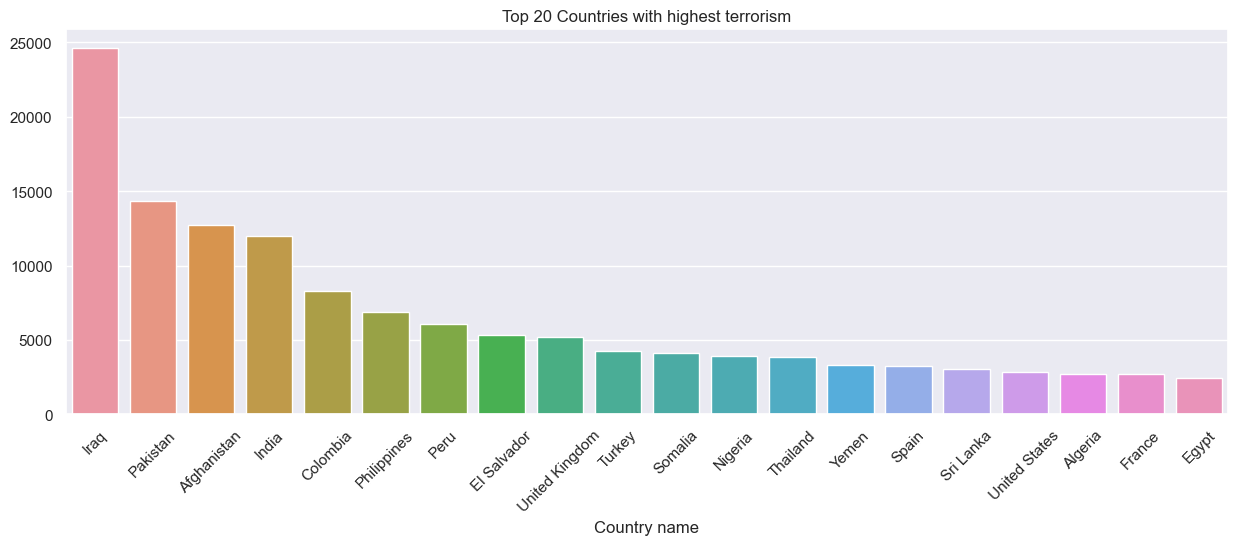

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Country.value_counts().head(20).index, y = df.Country.value_counts().head(20).values)
plt.xlabel('Country name')
plt.title('Top 20 Countries with highest terrorism')
plt.xticks(rotation=45)
plt.show()

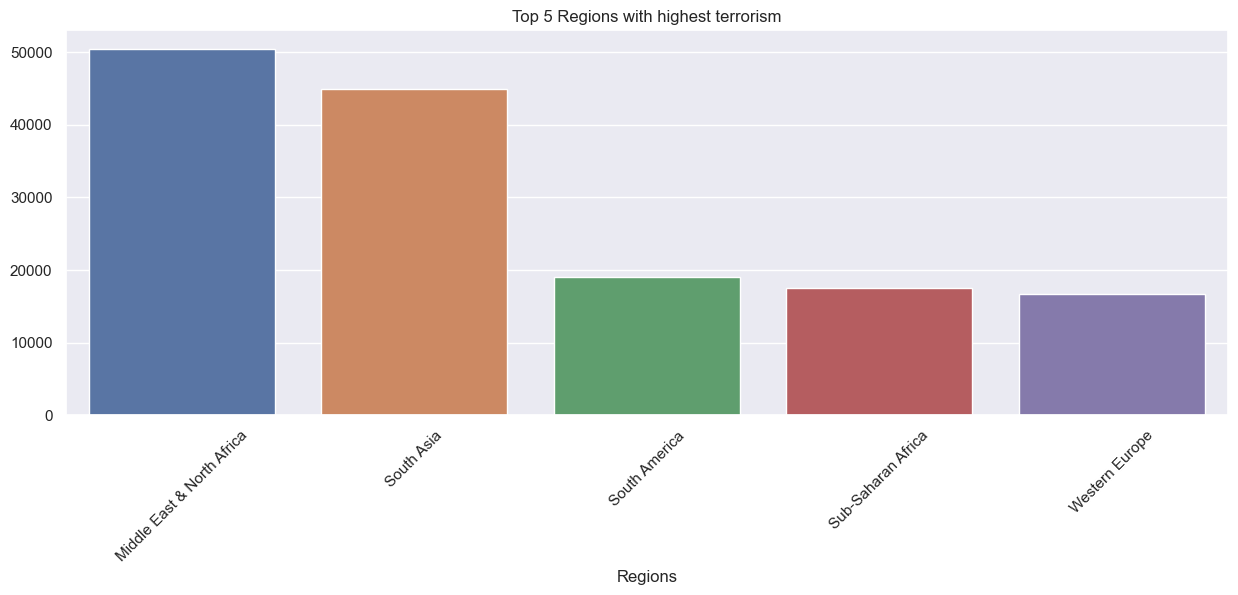

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Region.value_counts().head(5).index, y = df.Region.value_counts().head(5).values)
plt.xlabel('Regions')
plt.title('Top 5 Regions with highest terrorism')
plt.xticks(rotation=45)
plt.show()

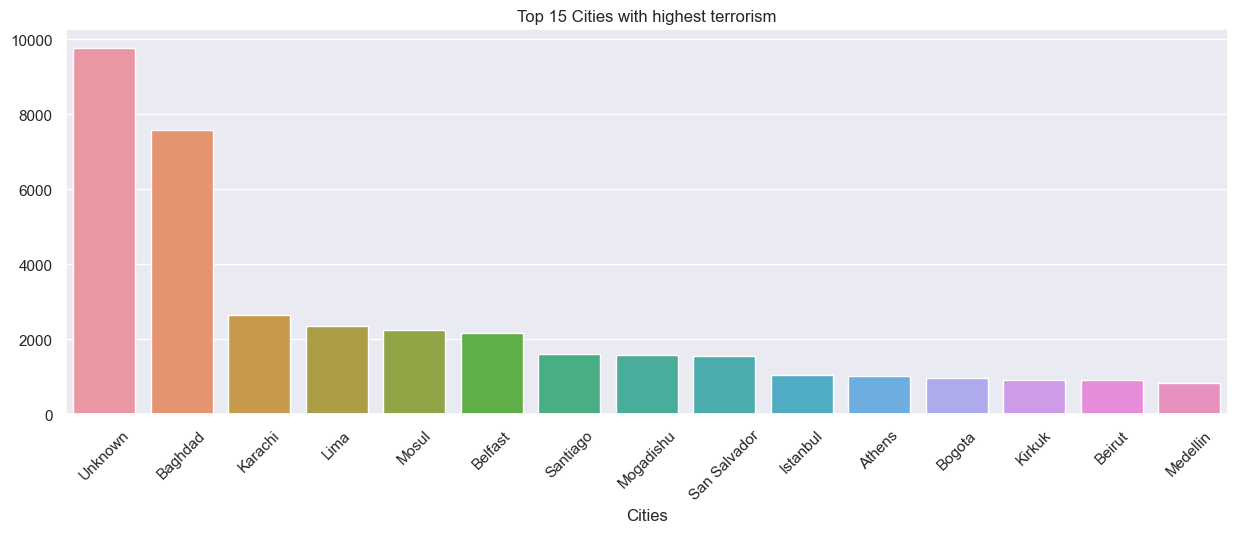

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.City.value_counts().head(15).index, y = df.City.value_counts().head(15).values)
plt.xlabel('Cities')
plt.title('Top 15 Cities with highest terrorism')
plt.xticks(rotation=45)
plt.show()

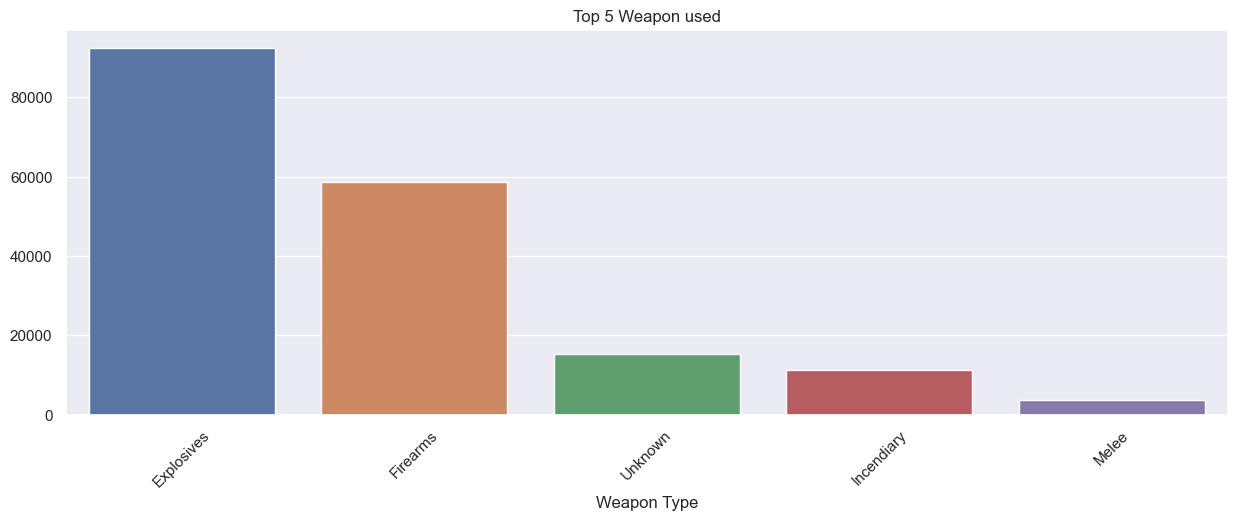

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.WeaponType.value_counts().head(5).index, y = df.WeaponType.value_counts().head(5).values)
plt.xlabel('Weapon Type')
plt.title('Top 5 Weapon used')
plt.xticks(rotation=45)
plt.show()

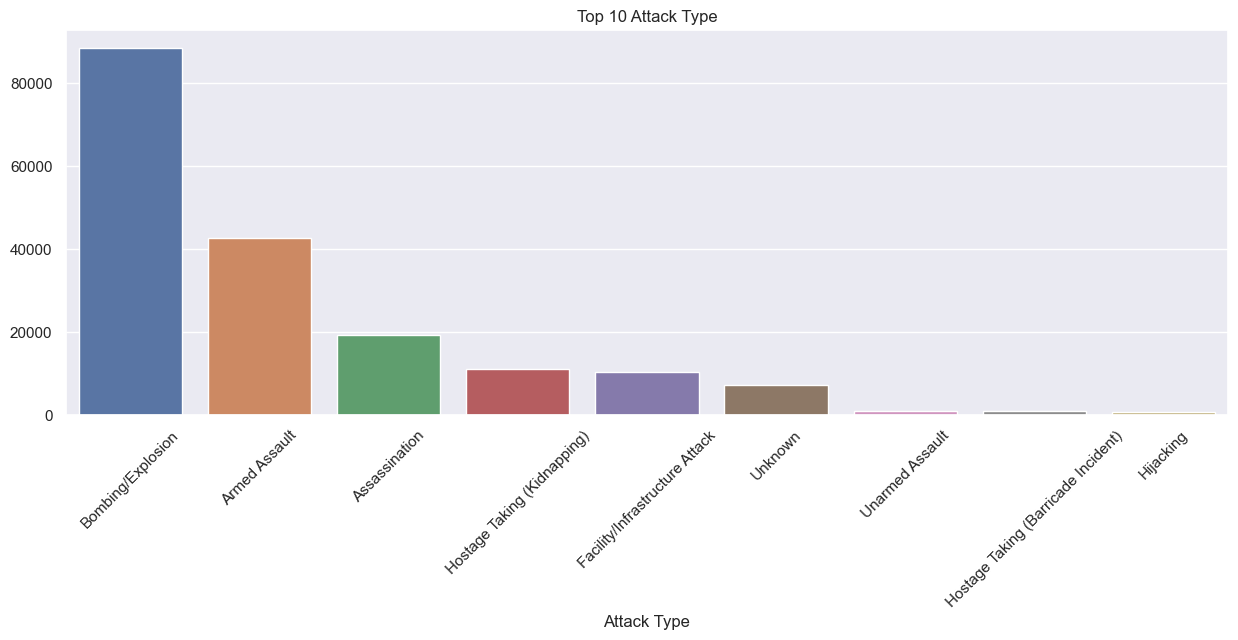

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.AttackType.value_counts().head(10).index, y = df.AttackType.value_counts().head(10).values)
plt.xlabel('Attack Type')
plt.title('Top 10 Attack Type')
plt.xticks(rotation=45)
plt.show()

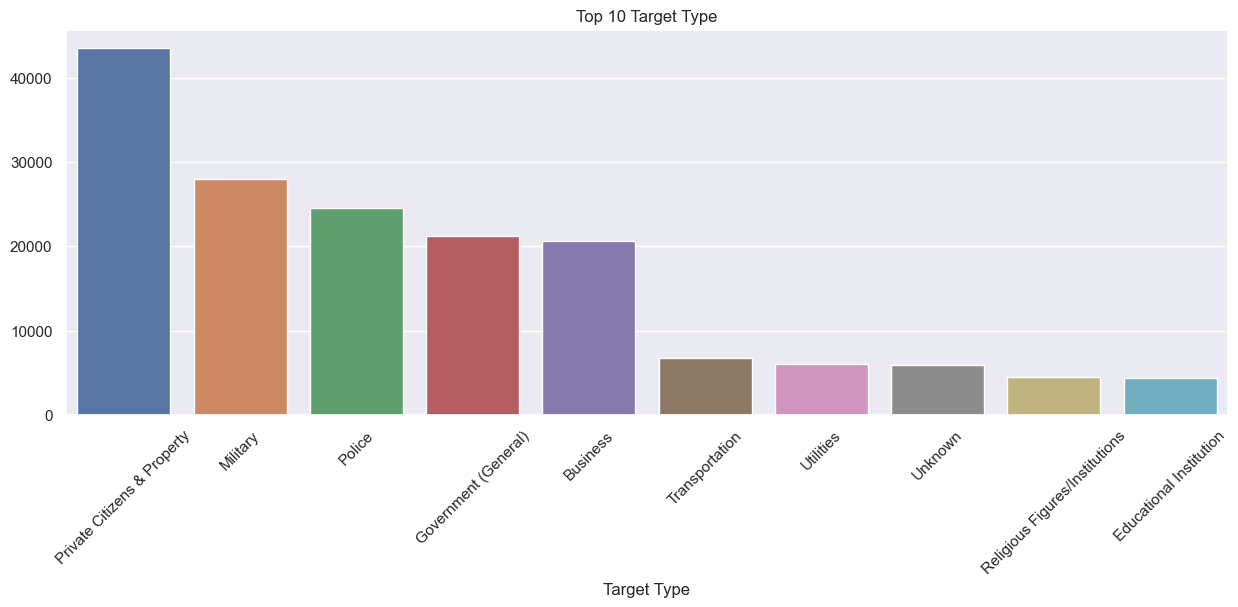

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.TargetType.value_counts().head(10).index, y = df.TargetType.value_counts().head(10).values)
plt.xlabel('Target Type')
plt.title('Top 10 Target Type')
plt.xticks(rotation=45)
plt.show()

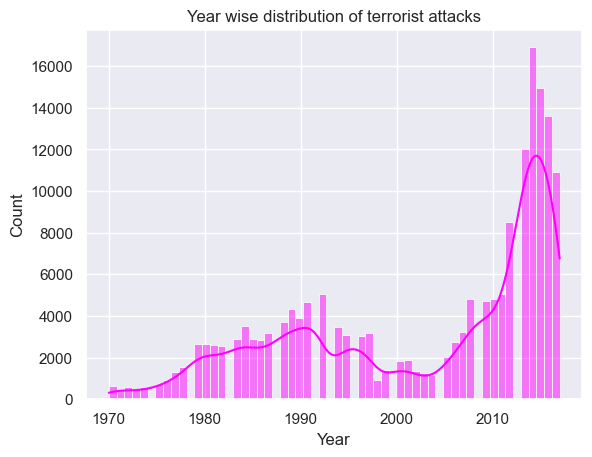

In [45]:
sns.histplot( x= "Year",data = df, kde=True, color='fuchsia')
plt.title('Year wise distribution of terrorist attacks')
plt.show()

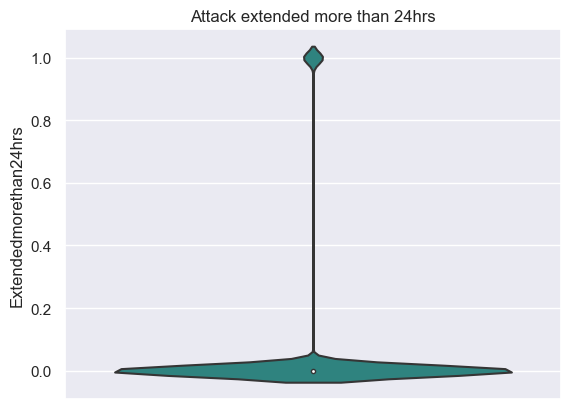

In [47]:
sns.violinplot(y='Extendedmorethan24hrs', data=df,palette ="viridis")
plt.title('Attack extended more than 24hrs')
plt.show()

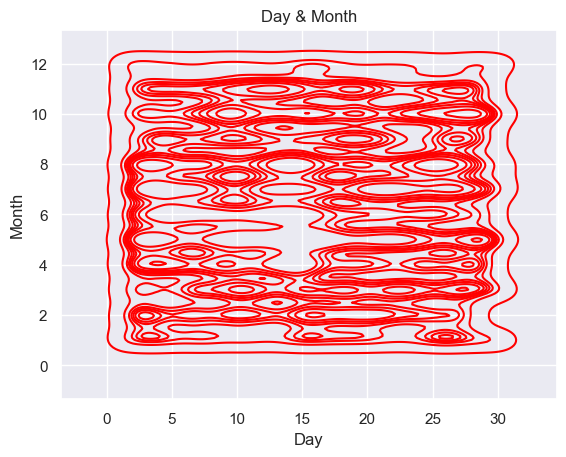

In [53]:
sns.kdeplot(x='Day', y= 'Month',data=df,color='red')
plt.title('Day & Month')
plt.show()

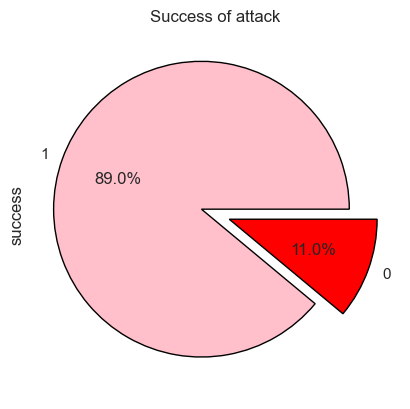

In [59]:
df['success'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%0.1f%%',
                                 colors=('pink','red'),wedgeprops={'edgecolor': 'black'})
plt.title('Success of attack')
plt.show()

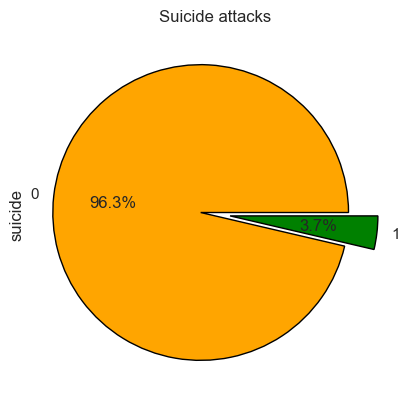

In [65]:
df['suicide'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%0.1f%%',
                                 colors=('orange','green'),wedgeprops={'edgecolor': 'black'})
plt.title('Suicide attacks')
plt.show()

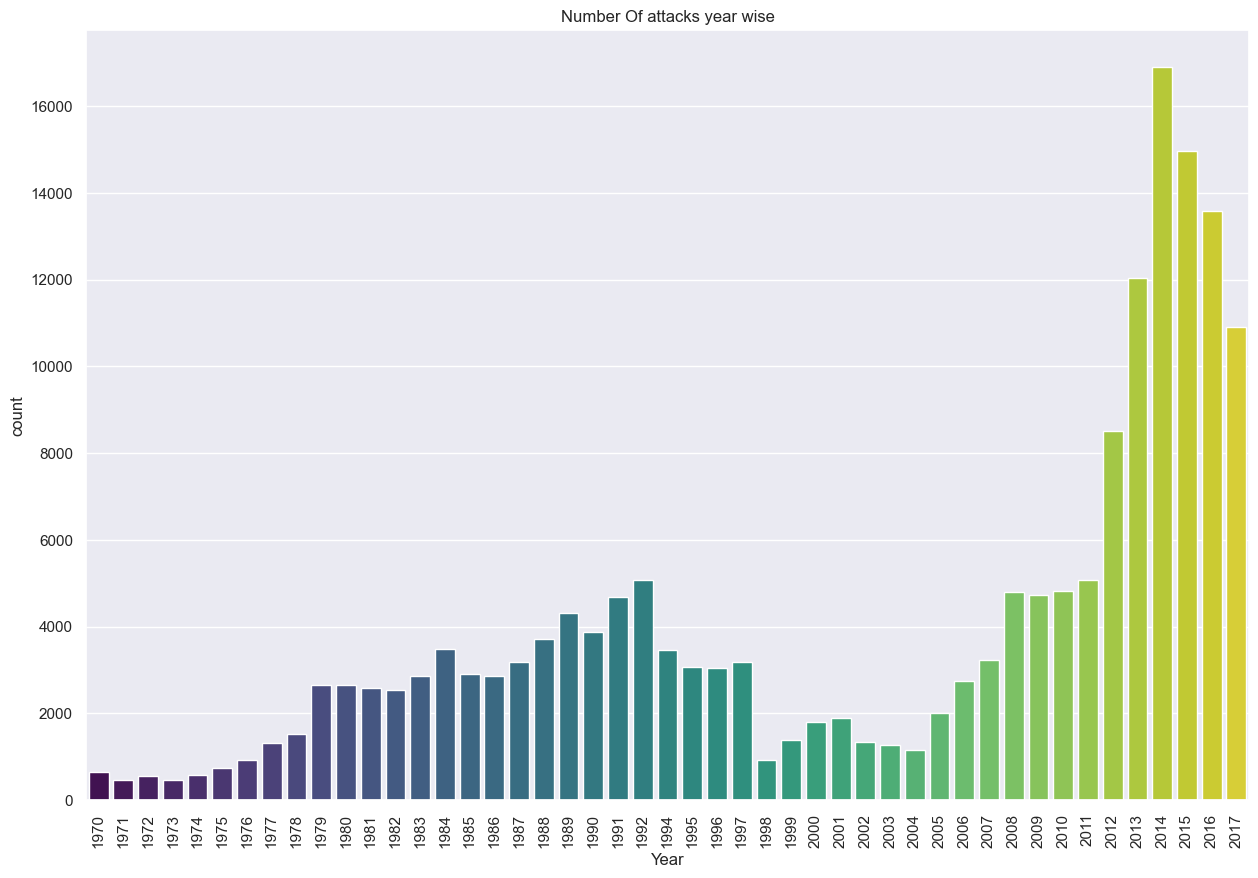

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=df,palette='viridis')
plt.title('Number Of attacks year wise')
plt.xticks(rotation=90)
plt.show()

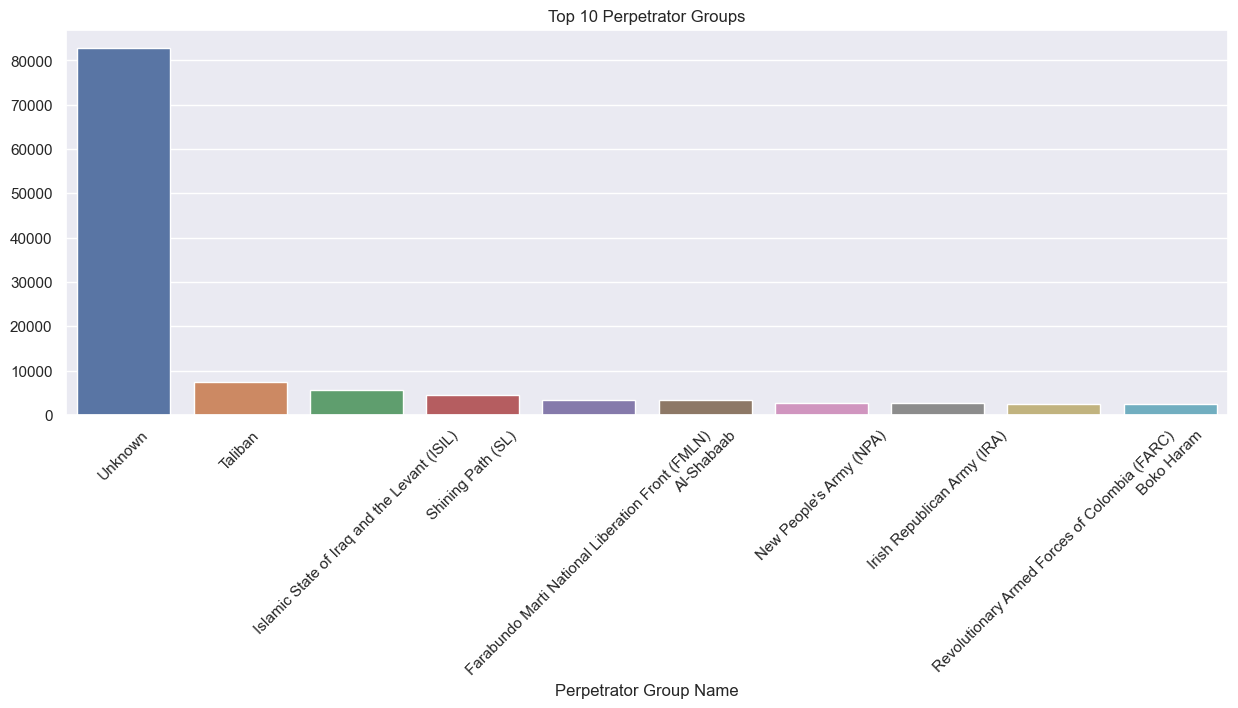

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.PerpetratorGroupName.value_counts().head(10).index, y = df.PerpetratorGroupName.value_counts().head(10).values)
plt.xlabel('Perpetrator Group Name')
plt.title('Top 10 Perpetrator Groups')
plt.xticks(rotation=45)
plt.show()

In [84]:
df['HostagesKidnapping'].value_counts()

 0.0    167624
 1.0     13572
-9.0       317
Name: HostagesKidnapping, dtype: int64

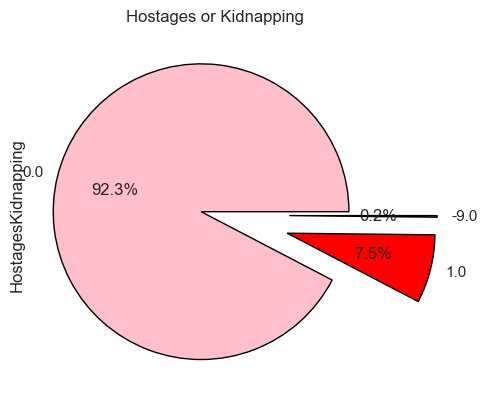

In [87]:
df['HostagesKidnapping'].value_counts().plot(kind='pie',explode=[0.1,0.5,0.5],autopct='%0.1f%%',
                                 colors=('pink','red','orange'),wedgeprops={'edgecolor': 'black'})
plt.title('Hostages or Kidnapping')
plt.show()

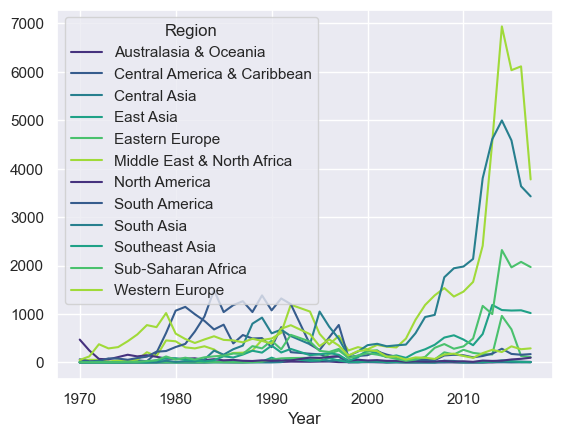

In [101]:
dfregion=pd.crosstab(df.Year,df.Region)
dfregion.plot(color=sns.color_palette('viridis'))
plt.show()

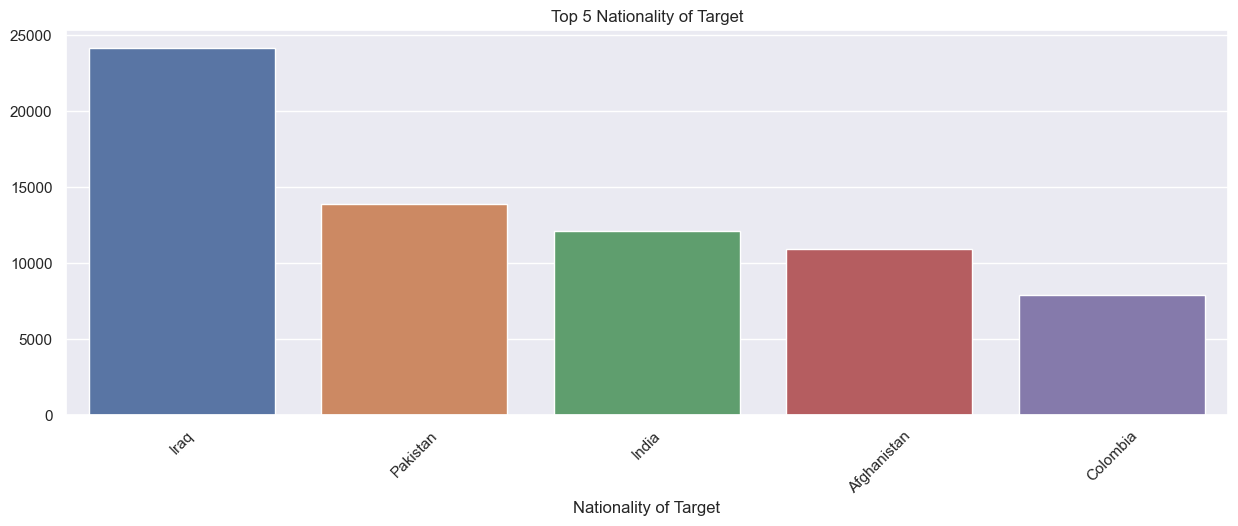

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.NationalityTarget.value_counts().head(5).index, y = df.NationalityTarget.value_counts().head(5).values)
plt.xlabel('Nationality of Target')
plt.title('Top 5 Nationality of Target')
plt.xticks(rotation=45)
plt.show()

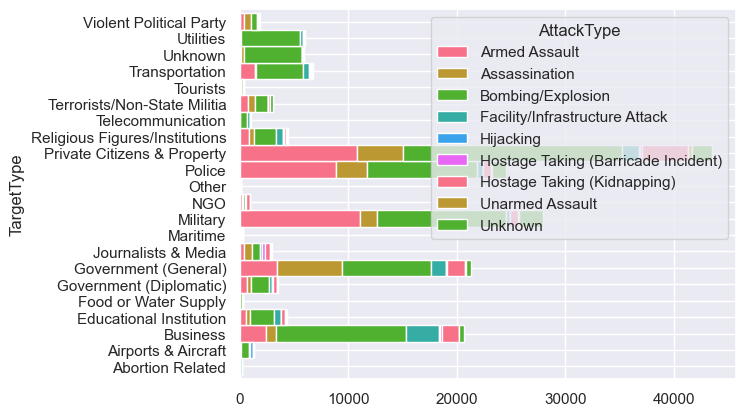

In [108]:
pd.crosstab(df.TargetType,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('husl'))
plt.show()

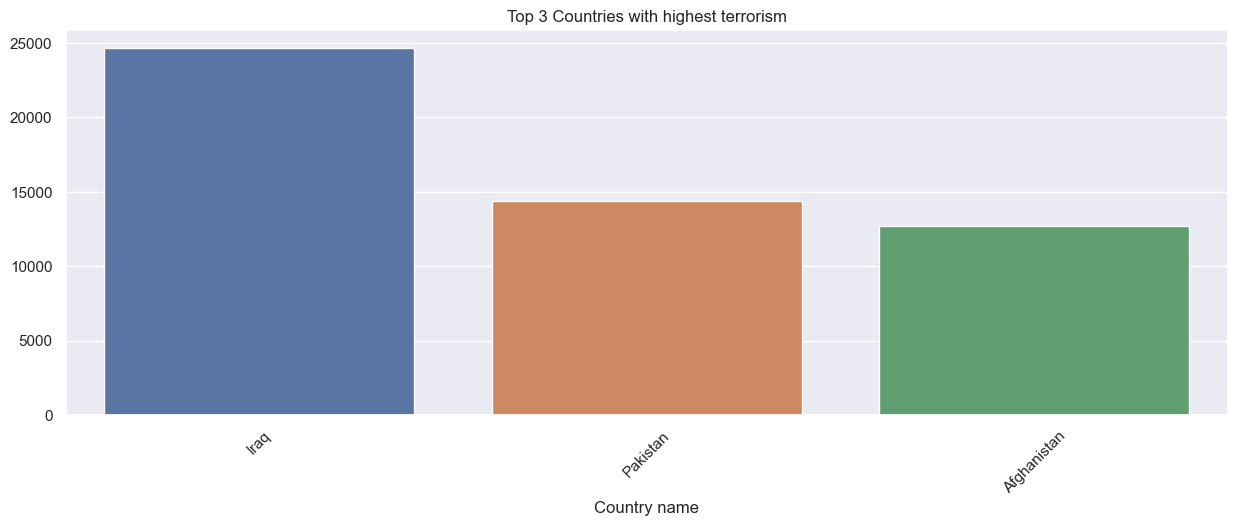

In [109]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Country.value_counts().head(3).index, y = df.Country.value_counts().head(3).values)
plt.xlabel('Country name')
plt.title('Top 3 Countries with highest terrorism')
plt.xticks(rotation=45)
plt.show()

#### Analysis of Iraq

In [110]:
df_iraq=df[df['Country']=='Iraq']

In [112]:
df_iraq.columns

Index(['Year', 'Month', 'Day', 'Extendedmorethan24hrs', 'Country', 'Region',
       'City', 'latitude', 'longitude', 'DoubtOnAct', 'MultipleIncident',
       'success', 'suicide', 'AttackType', 'TargetType', 'NationalityTarget',
       'PerpetratorGroupName', 'individual', 'WeaponType', 'PropertyDamage',
       'HostagesKidnapping', 'InternationalLogistical',
       'InternationalIdeological'],
      dtype='object')

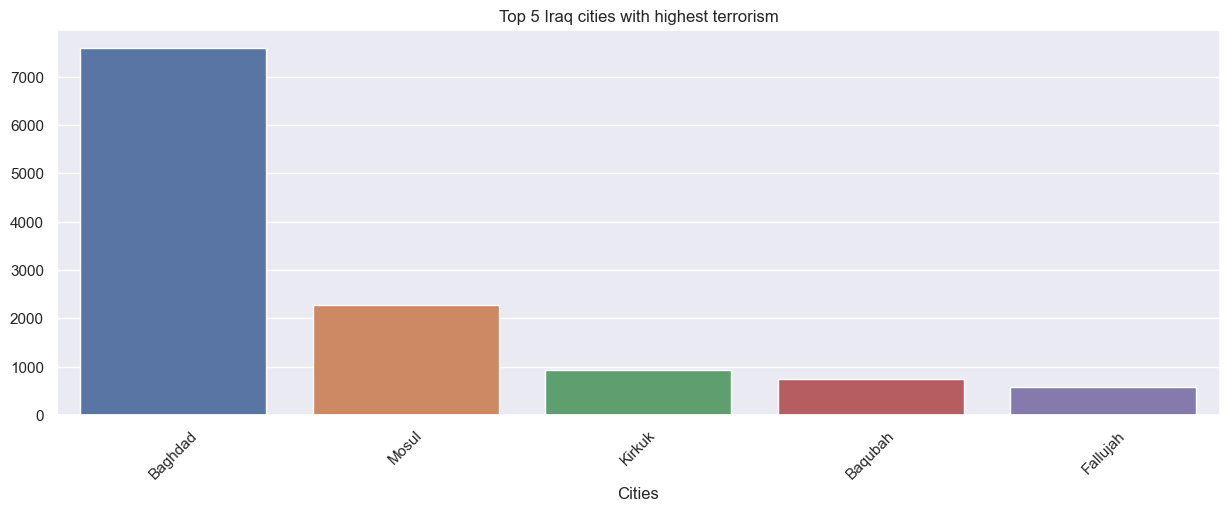

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_iraq.City.value_counts().head(5).index, y = df_iraq.City.value_counts().head(5).values)
plt.xlabel('Cities')
plt.title('Top 5 Iraq cities with highest terrorism')
plt.xticks(rotation=45)
plt.show()

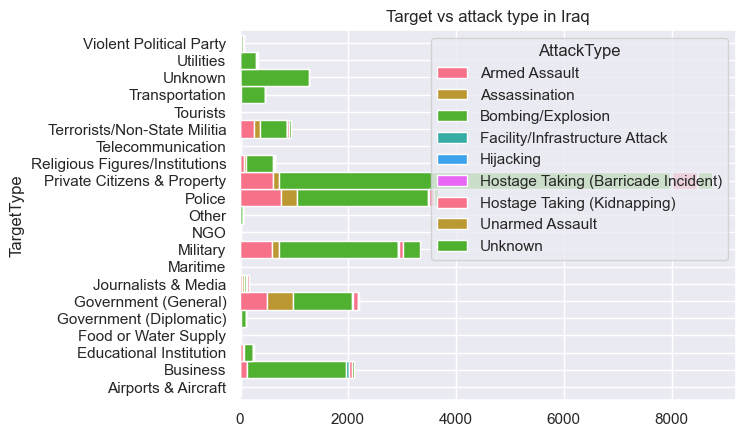

In [115]:
pd.crosstab(df_iraq.TargetType,df_iraq.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('husl'))
plt.title('Target vs attack type in Iraq')
plt.show()

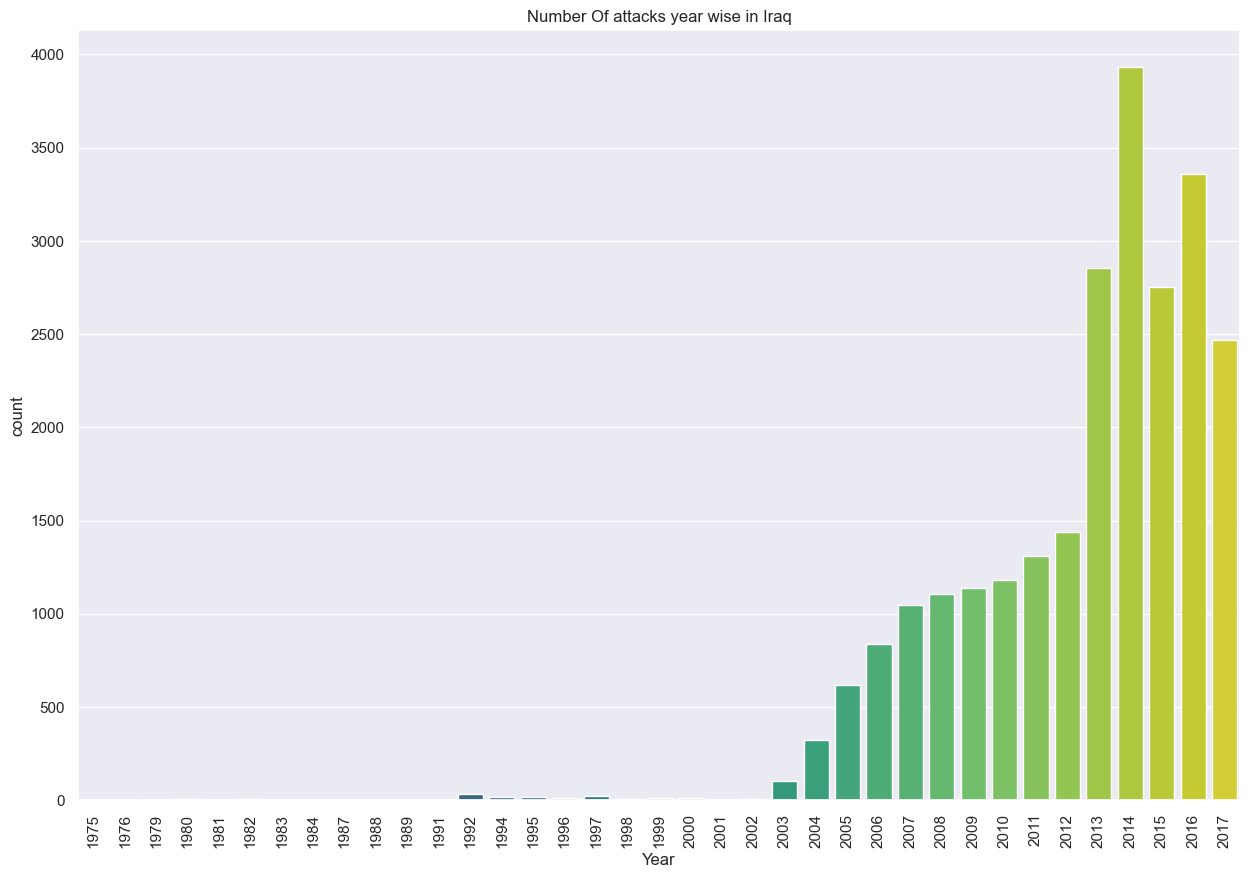

In [117]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=df_iraq,palette='viridis')
plt.title('Number Of attacks year wise in Iraq')
plt.xticks(rotation=90)
plt.show()

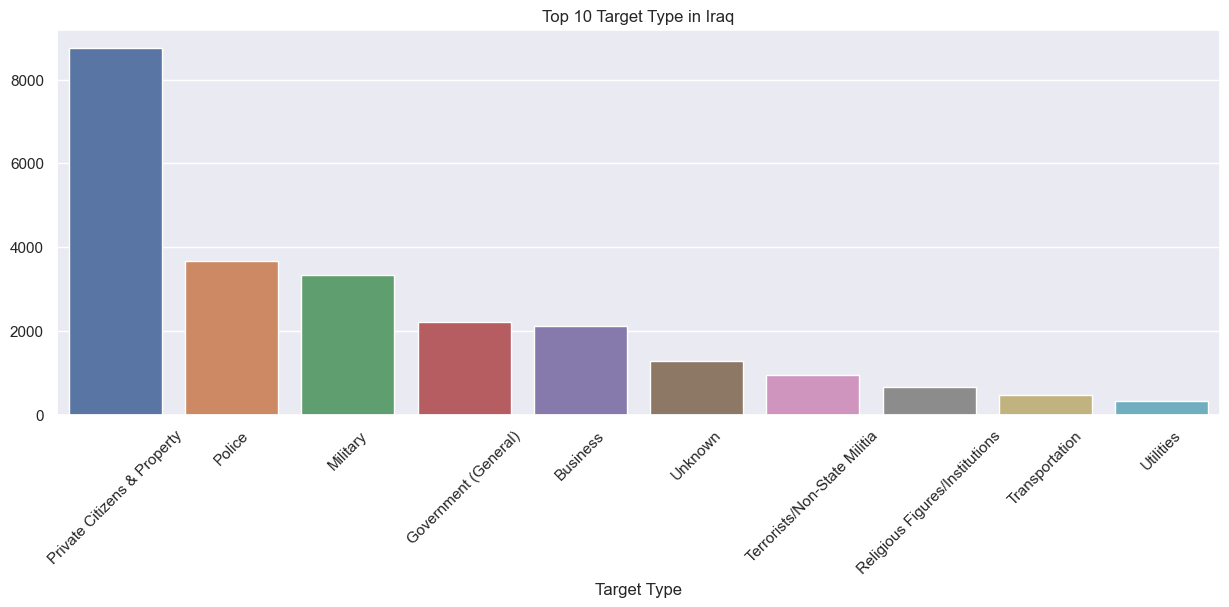

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_iraq.TargetType.value_counts().head(10).index, y = df_iraq.TargetType.value_counts().head(10).values)
plt.xlabel('Target Type')
plt.title('Top 10 Target Type in Iraq')
plt.xticks(rotation=45)
plt.show()

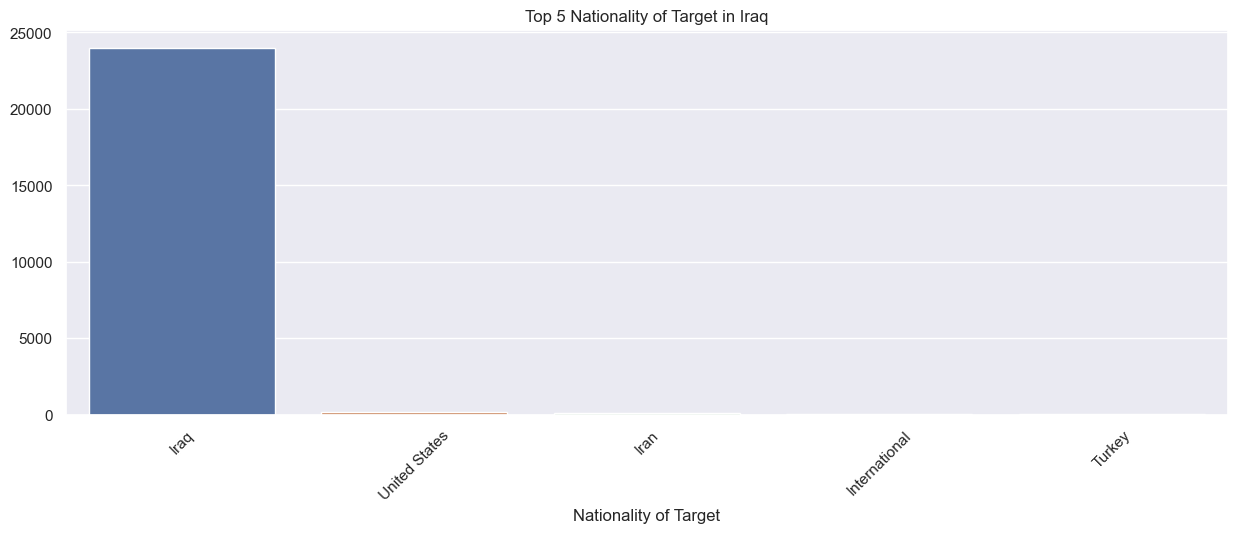

In [121]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_iraq.NationalityTarget.value_counts().head(5).index, y = df_iraq.NationalityTarget.value_counts().head(5).values)
plt.xlabel('Nationality of Target')
plt.title('Top 5 Nationality of Target in Iraq')
plt.xticks(rotation=45)
plt.show()

#### Analysis of India

In [124]:
df_India=df[df['Country']=='India']

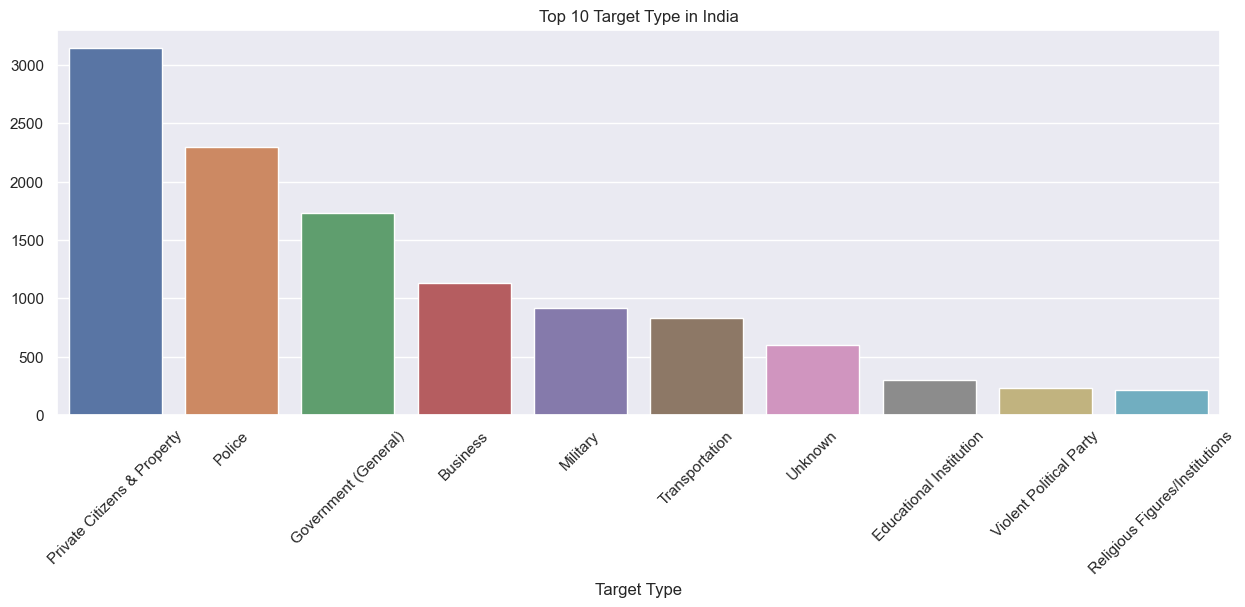

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_India.TargetType.value_counts().head(10).index, y = df_India.TargetType.value_counts().head(10).values)
plt.xlabel('Target Type')
plt.title('Top 10 Target Type in India')
plt.xticks(rotation=45)
plt.show()

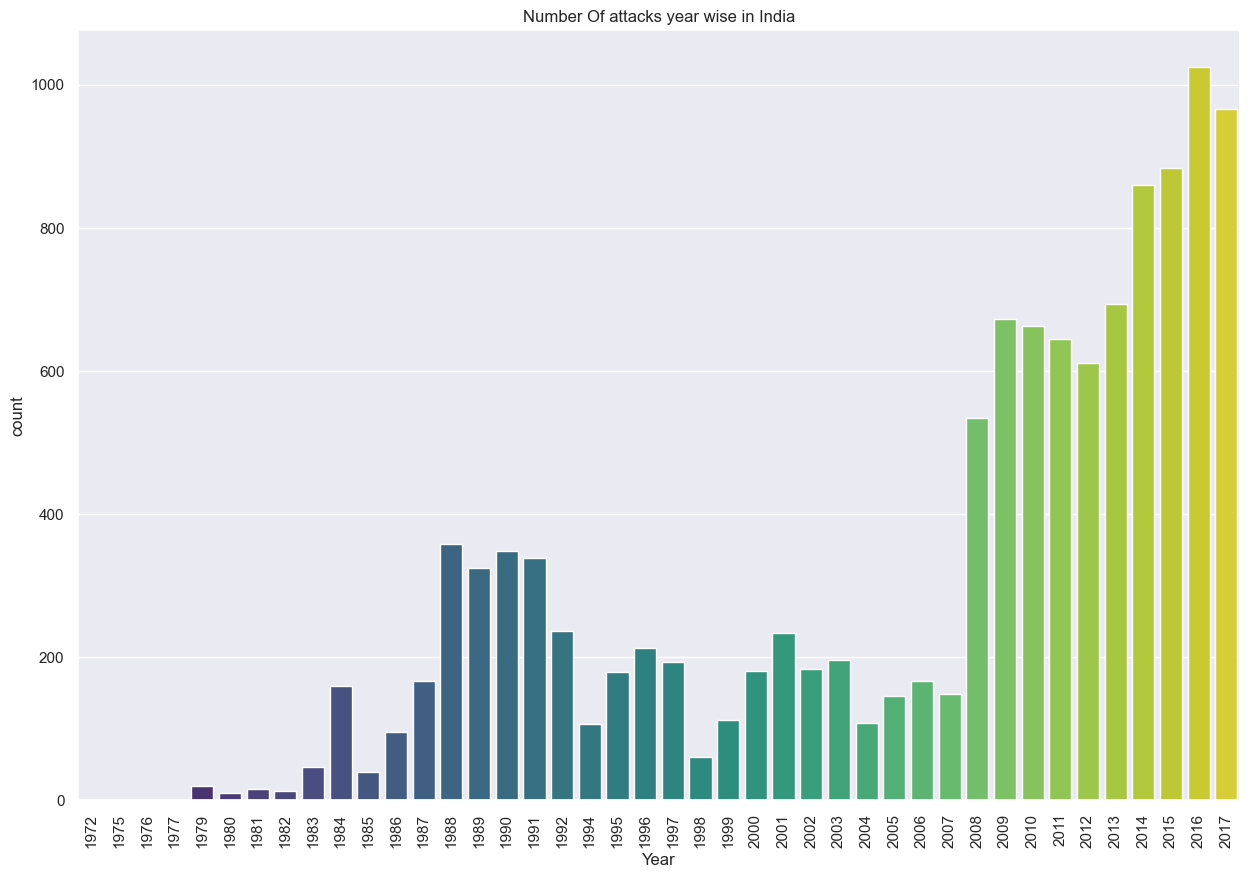

In [126]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=df_India,palette='viridis')
plt.title('Number Of attacks year wise in India')
plt.xticks(rotation=90)
plt.show()

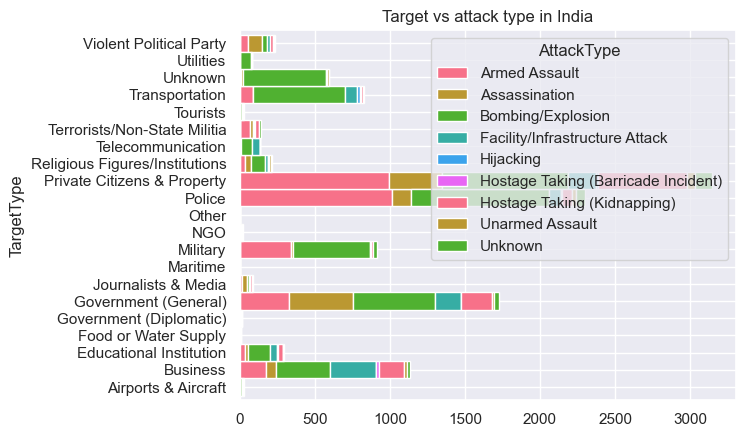

In [127]:
pd.crosstab(df_India.TargetType,df_India.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('husl'))
plt.title('Target vs attack type in India')
plt.show()

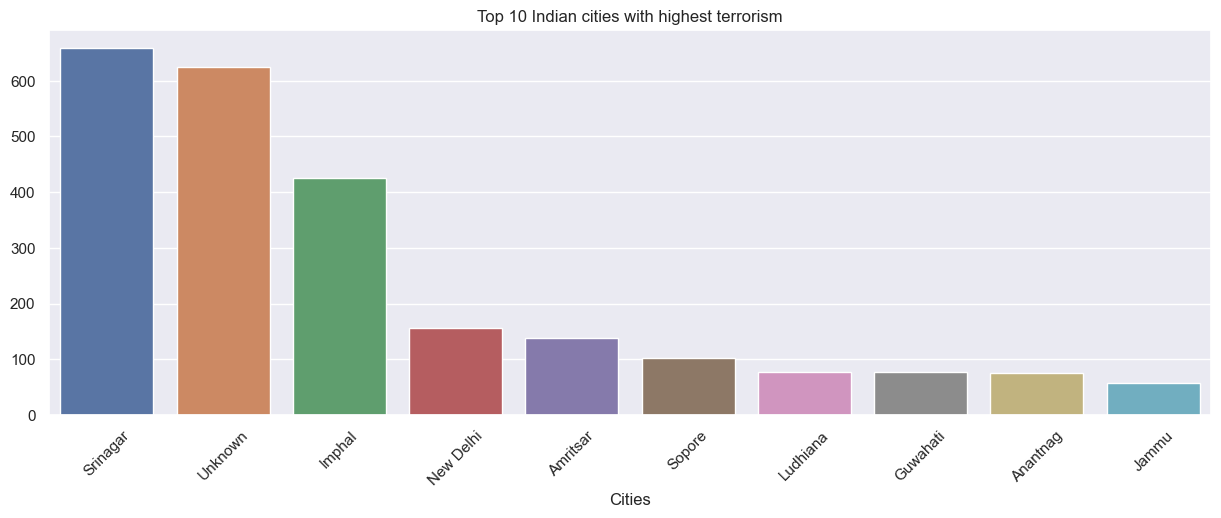

In [129]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_India.City.value_counts().head(10).index, y = df_India.City.value_counts().head(10).values)
plt.xlabel('Cities')
plt.title('Top 10 Indian cities with highest terrorism')
plt.xticks(rotation=45)
plt.show()